# Popular Routes and Station Route Diversity of Mobi Bikes in Vancouver
#### by: Jordan Fortney

### Data Exploration:
#### Packages

In [67]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import json

#### Data Upload

In [68]:
# converts any excel files to .csv
dataPath = 'data'
for file in os.listdir(dataPath):
    if file.endswith('.xlsx'):
        tempDF = pd.read_excel(dataPath+'/'+file)
        tempDF.to_csv(dataPath+'/'+os.path.splitext(file)[0]+'.csv', index = False)

In [69]:
# appends all .csv file in the local data repository into a single dataframe
mobiDF = pd.DataFrame()
for file in os.listdir(dataPath):
    if file.endswith('.csv'):
        tempDF = pd.read_csv(dataPath+'/'+file, infer_datetime_format = True)
        mobiDF = mobiDF.append(tempDF)
mobiDF.reset_index(drop = True, inplace = True)

In [70]:
mobiDF

,Departure,Return,Account,Bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure battery voltage (mV),...,Departure slot,Return slot,Departure temperature (deg C),Return temperature (deg C),Departure temperature (C),Return temperature (C),Stopover duration,Manager,Number of bike stopovers,Return temperature (Â°C)
0,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0002 Burrard Station,365 Day Founding Plus,1382.0,402,3715.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00001,754.0,0048 Comox & Broughton,0048 Comox & Broughton,365 Day Founding Plus,0.0,17,3797.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00002,517.0,0093 Chilco & Robson,0035 Coal Harbour Community Centre,365 Day Founding Standard,1960.0,1015,3645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00003,231.0,0071 14th & Granville,0211 14th & Alder,365 Corporate Plus,624.0,194,3650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01 00:00:00,2018-01-01 00:00:00,ID00004,1302.0,0187 Bute & Davie,0079 Nelson & Richards,365 Day Founding Plus,1756.0,571,3686.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908475,2021-04-01 0:00,2021-04-01 1:00,NaN,1272.0,0278 15th & Victoria (Trout Lake),0228 Keefer & Hawks,365 Day Pass Plus SALE,3904.0,1197,3752.0,...,NaN,NaN,NaN,NaN,7.0,10.0,NaN,NaN,0.0,NaN
2908476,2021-04-01 0:00,2021-04-01 0:00,NaN,875.0,0126 Thurlow & Pendrell,0138 Richards & Helmcken,30 Day Pass,971.0,361,3997.0,...,NaN,NaN,NaN,NaN,11.0,13.0,NaN,NaN,0.0,NaN
2908477,2021-04-01 0:00,2021-04-01 0:00,NaN,380.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1502.0,463,3586.0,...,NaN,NaN,NaN,NaN,9.0,11.0,NaN,NaN,0.0,NaN
2908478,2021-04-01 0:00,2021-04-01 0:00,NaN,668.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1462.0,485,3495.0,...,NaN,NaN,NaN,NaN,9.0,11.0,NaN,NaN,0.0,NaN


#### Null and Missing Value Treatment

In [71]:
# function to print the number and percentage of null values
def nullPercent(df):
    # Create a temp dataframe for null vlaue totals
    nullTotalDF = pd.DataFrame(df.isnull().sum()).reset_index()
    nullTotalDF.columns = ['Category', 'Total Null']
    # Create a temp dataframe for null value percentages
    nullPercentDF = pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,2)).reset_index()
    nullPercentDF.columns = ['Category', 'Percent Null (%)']
    # Merge temporary null value datasets and sort by null percentage
    nullDF = pd.merge(nullTotalDF, nullPercentDF, on = 'Category')
    display(nullDF.sort_values('Percent Null (%)', ascending = False))

In [72]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
26,Return temperature (Â°C),2876218,98.89
20,Return temperature (deg C),2869232,98.65
19,Departure temperature (deg C),2869232,98.65
15,Formula,2862692,98.43
23,Stopover duration,2845627,97.84
24,Manager,2782010,95.65
17,Departure slot,2719422,93.50
18,Return slot,2719155,93.49
25,Number of bike stopovers,2619601,90.07
16,Membership Type,2559468,88.00


In [73]:
# Check the feature names within each data file and convert to standardized format
mobiDF = pd.DataFrame()
for file in os.listdir(dataPath):
    if file.endswith('.csv'):
        tempDF = pd.read_csv(dataPath+'/'+file)
        for c in tempDF.columns:
            if c == 'Return temperature (Â°C)':
                tempDF.rename(columns = {'Return temperature (Â°C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Formula':
                tempDF.rename(columns = {'Formula':'Membership type'}, inplace = True)
            elif c == 'Return temperature (deg C)':
                tempDF.rename(columns = {'Return temperature (deg C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Departure temperature (deg C)':
                tempDF.rename(columns = {'Departure temperature (deg C)':'Departure temperature (°C)'}, inplace = True)
            elif c == 'Membership Type':
                tempDF.rename(columns = {'Membership Type':'Membership type'}, inplace = True)
            elif c == 'Departure temperature (C)':
                tempDF.rename(columns = {'Departure temperature (C)':'Departure temperature (°C)'}, inplace = True)
            elif c == 'Return temperature (C)':
                tempDF.rename(columns = {'Return temperature (C)':'Return temperature (°C)'}, inplace = True)
            elif c == 'Number of bike stopovers':
                tempDF.rename(columns = {'Number of bike stopovers':'Number of stopovers'}, inplace = True)
            elif c == 'Stopover duration':
                tempDF.rename(columns = {'Stopover duration':'Stopover duration (sec.)'}, inplace = True)
        mobiDF = mobiDF.append(tempDF)
mobiDF.reset_index(drop = True, inplace = True)

In [74]:
# Print null values
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
17,Manager,2782010,95.65
15,Departure slot,2719422,93.50
16,Return slot,2719155,93.49
2,Account,2335036,80.28
10,Return battery voltage (mV),53521,1.84
9,Departure battery voltage (mV),53521,1.84
3,Bike,1190,0.04
6,Membership type,498,0.02
1,Return,153,0.01
5,Return station,253,0.01


In [75]:
# drop features with > 80% null values
mobiDF.drop(columns = ['Manager', 'Departure slot', 'Return slot', 'Account', 'Departure battery voltage (mV)', 'Return battery voltage (mV)', 'Number of stopovers', 'Stopover duration (sec.)'], inplace = True)

In [76]:
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
2,Bike,1190,0.04
5,Membership type,498,0.02
1,Return,153,0.01
4,Return station,253,0.01
0,Departure,0,0.00
3,Departure station,9,0.00
6,Covered distance (m),0,0.00
7,Duration (sec.),0,0.00
8,Departure temperature (°C),0,0.00
9,Return temperature (°C),0,0.00


In [77]:
# drop remaining records containing null values
mobiDF.dropna(inplace = True)

In [78]:
# final null value check
nullPercent(mobiDF)

,Category,Total Null,Percent Null (%)
0,Departure,0,0.0
1,Return,0,0.0
2,Bike,0,0.0
3,Departure station,0,0.0
4,Return station,0,0.0
5,Membership type,0,0.0
6,Covered distance (m),0,0.0
7,Duration (sec.),0,0.0
8,Departure temperature (°C),0,0.0
9,Return temperature (°C),0,0.0


In [79]:
# replace spaces in column names with underscore because spaces are bad and annoying
mobiDF.columns = mobiDF.columns.str.replace(' ','_',)

#### Data Transformations

In [80]:
# check the date distribution of the data
mobiDF['tempDepDate'] = pd.to_datetime(mobiDF['Departure'])
mobiDF['tempDepDate'].groupby([mobiDF.tempDepDate.dt.year, mobiDF.tempDepDate.dt.month]).agg('count')

tempDepDate  tempDepDate
2017         1               17055
             2               18027
             3               21344
             4               32407
             5               54367
             6               75968
             7               99751
             8               98034
             9               66660
             10              44863
             11              24629
             12              20425
2018         1               20393
             2               22258
             3               36793
             4               42590
             5               88294
             6               87283
             7              114357
             8              110945
             9               77480
             10              65285
             11              39235
             12              27567
2019         1               36751
             2               26090
             3               57441
             4               5

In [81]:
# separate dates and time
mobiDF[['Departure_date','Departure_time']] = mobiDF.Departure.str.split(' ', 1, expand = True)
mobiDF[['Return_date','Return_time']] = mobiDF.Return.str.split(' ', 1, expand = True)
# convert isolated date to standard datetime format
mobiDF['Departure_date'] = pd.to_datetime(mobiDF['Departure_date'])
mobiDF['Return_date'] = pd.to_datetime(mobiDF['Return_date'])

# drop entries from May 2021 since the month is incomplete
mayIndex = mobiDF.loc[mobiDF['Departure_date'] > '2021-04-30'].index
mobiDF.drop(mayIndex, inplace = True)

# recombine the reformatted dates and original times
mobiDF['Departure'] = mobiDF['Departure_date'].astype(str) + " " + mobiDF['Departure_time']
mobiDF['Return'] = mobiDF['Return_date'].astype(str) + " " + mobiDF['Return_time']
mobiDF.drop(['Departure_date', 'Departure_time', 'Return_date', 'Return_time'], axis = 1, inplace = True)

In [82]:
mobiDF

,Departure,Return,Bike,Departure_station,Return_station,Membership_type,Covered_distance_(m),Duration_(sec.),Departure_temperature_(°C),Return_temperature_(°C),tempDepDate
0,2018-01-01 00:00:00,2018-01-01 00:00:00,754.0,0048 Comox & Broughton,0002 Burrard Station,365 Day Founding Plus,1382.0,402,2,4,2018-01-01
1,2018-01-01 00:00:00,2018-01-01 00:00:00,754.0,0048 Comox & Broughton,0048 Comox & Broughton,365 Day Founding Plus,0.0,17,2,1,2018-01-01
2,2018-01-01 00:00:00,2018-01-01 00:00:00,517.0,0093 Chilco & Robson,0035 Coal Harbour Community Centre,365 Day Founding Standard,1960.0,1015,0,1,2018-01-01
3,2018-01-01 00:00:00,2018-01-01 00:00:00,231.0,0071 14th & Granville,0211 14th & Alder,365 Corporate Plus,624.0,194,0,1,2018-01-01
4,2018-01-01 00:00:00,2018-01-01 00:00:00,1302.0,0187 Bute & Davie,0079 Nelson & Richards,365 Day Founding Plus,1756.0,571,2,3,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...
2908475,2021-04-01 0:00,2021-04-01 1:00,1272.0,0278 15th & Victoria (Trout Lake),0228 Keefer & Hawks,365 Day Pass Plus SALE,3904.0,1197,7,10,2021-04-01
2908476,2021-04-01 0:00,2021-04-01 0:00,875.0,0126 Thurlow & Pendrell,0138 Richards & Helmcken,30 Day Pass,971.0,361,11,13,2021-04-01
2908477,2021-04-01 0:00,2021-04-01 0:00,380.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1502.0,463,9,11,2021-04-01
2908478,2021-04-01 0:00,2021-04-01 0:00,668.0,0060 Bidwell & Burnaby,0045 Beach & Hornby,30 Day Pass,1462.0,485,9,11,2021-04-01


In [83]:
# create individual features for the numeric and alpha station ids from the original alphanumeric names
mobiDF[['Departure_ID','Departure_Station']] = mobiDF.Departure_station.str.split(' ', 1, expand = True)
mobiDF[['Return_ID','Return_Station']] = mobiDF.Return_station.str.split(' ', 1, expand = True)
mobiDF.drop('Departure_station', axis = 1, inplace = True)
mobiDF.drop('Return_station', axis = 1, inplace = True)

In [84]:
# agglomerate membership types into day, month, and annual options
# * anything voer a month but under a year were treated as monthly passes
# ** anything I not specifically evident was treated as an annual pass
mobiDF['Membership_type'].replace(['24 Hour', 'Archived Day', 'Single Trip Pass', 'Archived Single Trip Pass', 'HOPR Pass'], 'Day Pass', inplace = True)
mobiDF['Membership_type'].replace(['30 Day Pass', 'Archived Monthly Standard', '90 Day', 'Archived Monthly Plus', 'Archived Monthly Basic', 'Archived 90 Day'], 'Monthly Pass', inplace = True)
mobiDF['Membership_type'].replace(['365 Standard', '365 Plus', '365 Day Founding Plus', '365 Day Founding Standard', '365 Corporate Plus', '365 Day Pass Standard SALE', '365 Day Pass Plus SALE', '365 Corporate Standard', 'Vancity Community Pass', 'Archived Founding Standard', '365 Corporate Plus Renewal', 'Archived Founding Plus', 'VIP', '365 Corporate Standard Renewal', 'Community Pass', 'Shared Mobility Pass'], 'Annual Pass', inplace = True)
mobiDF['Membership_type'].value_counts()

Annual Pass     1613041
Day Pass         683027
Monthly Pass     610675
Name: Membership_type, dtype: int64

#### Outlier Reduction

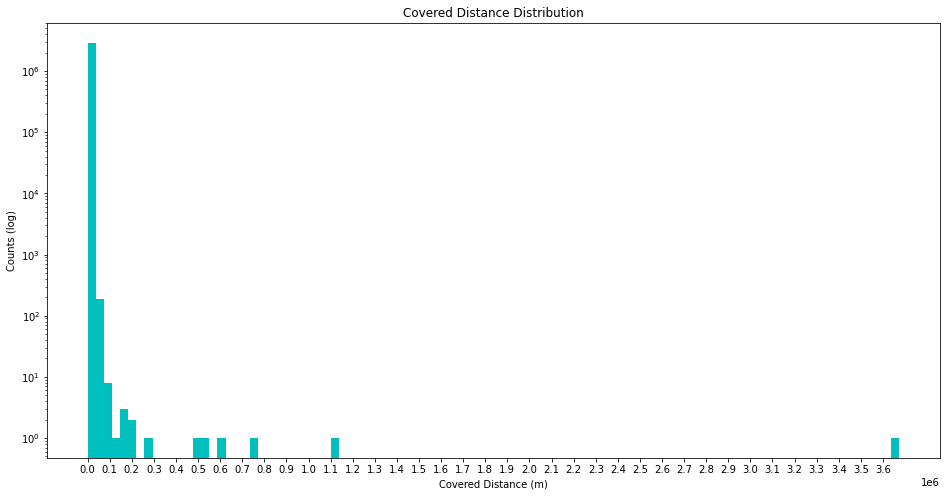

In [85]:
# plot distribution of covered distance
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Covered_distance_(m)'], log = True, bins = 100, color = 'c')
plt.title('Covered Distance Distribution')
plt.xlabel('Covered Distance (m)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Covered_distance_(m)'])),100000))
plt.show()

In [86]:
# calculate 95th percentile and drop values above
q95 = mobiDF['Covered_distance_(m)'].quantile(0.95)
mobiDF.drop(mobiDF[mobiDF['Covered_distance_(m)'] > q95].index, inplace = True)

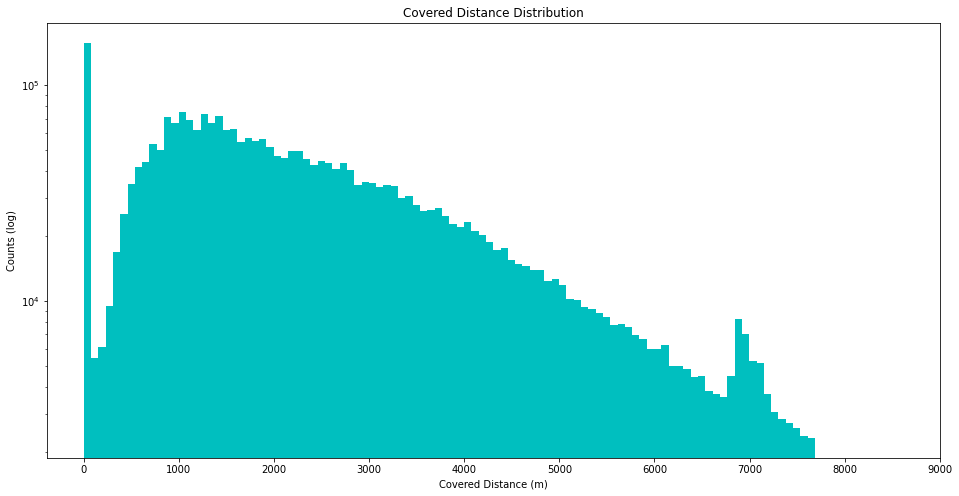

In [87]:
# plot distribution of covered distance after outlier reduction
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Covered_distance_(m)'], log = True, bins = 100, color = 'c')
plt.title('Covered Distance Distribution')
plt.xlabel('Covered Distance (m)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,10000,1000))
plt.show()

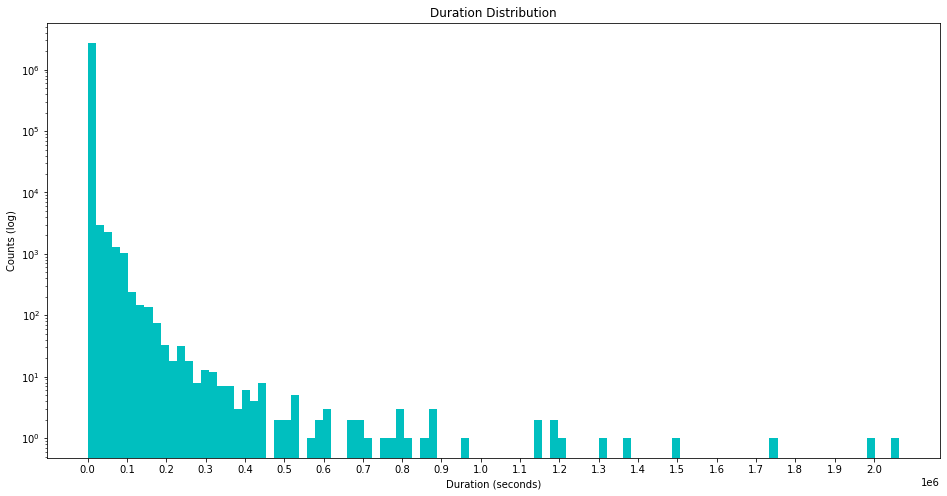

In [88]:
# plot distribution of duration
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Duration_(sec.)'], log = True, bins = 100, color = 'c')
plt.title('Duration Distribution')
plt.xlabel('Duration (seconds)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Duration_(sec.)'])),100000))
plt.show()

In [89]:
# calculate 95th percentile and drop values above
q95 = mobiDF['Duration_(sec.)'].quantile(0.95)
mobiDF.drop(mobiDF[mobiDF['Duration_(sec.)'] > q95].index, inplace = True)

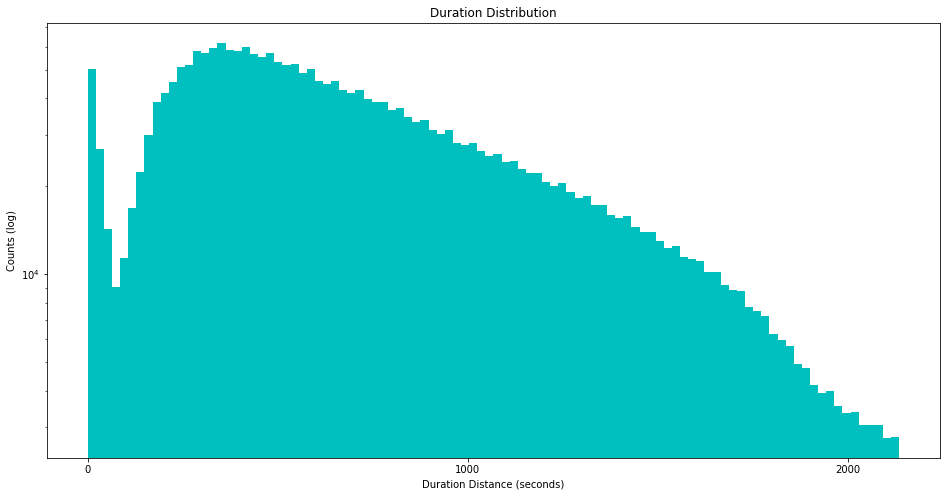

In [90]:
# Plot distribution of duration after outlier reduction
plt.figure(figsize = (16,8))
plt.hist(mobiDF['Duration_(sec.)'], log = True, bins = 100, color = 'c')
plt.title('Duration Distribution')
plt.xlabel('Duration Distance (seconds)')
plt.ylabel('Counts (log)')
plt.xticks(range(0,int(max(mobiDF['Duration_(sec.)'])),1000))
plt.show()

In [91]:
mobiDF

,Departure,Return,Bike,Membership_type,Covered_distance_(m),Duration_(sec.),Departure_temperature_(°C),Return_temperature_(°C),tempDepDate,Departure_ID,Departure_Station,Return_ID,Return_Station
0,2018-01-01 00:00:00,2018-01-01 00:00:00,754.0,Annual Pass,1382.0,402,2,4,2018-01-01,0048,Comox & Broughton,0002,Burrard Station
1,2018-01-01 00:00:00,2018-01-01 00:00:00,754.0,Annual Pass,0.0,17,2,1,2018-01-01,0048,Comox & Broughton,0048,Comox & Broughton
2,2018-01-01 00:00:00,2018-01-01 00:00:00,517.0,Annual Pass,1960.0,1015,0,1,2018-01-01,0093,Chilco & Robson,0035,Coal Harbour Community Centre
3,2018-01-01 00:00:00,2018-01-01 00:00:00,231.0,Annual Pass,624.0,194,0,1,2018-01-01,0071,14th & Granville,0211,14th & Alder
4,2018-01-01 00:00:00,2018-01-01 00:00:00,1302.0,Annual Pass,1756.0,571,2,3,2018-01-01,0187,Bute & Davie,0079,Nelson & Richards
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908475,2021-04-01 0:00,2021-04-01 1:00,1272.0,Annual Pass,3904.0,1197,7,10,2021-04-01,0278,15th & Victoria (Trout Lake),0228,Keefer & Hawks
2908476,2021-04-01 0:00,2021-04-01 0:00,875.0,Monthly Pass,971.0,361,11,13,2021-04-01,0126,Thurlow & Pendrell,0138,Richards & Helmcken
2908477,2021-04-01 0:00,2021-04-01 0:00,380.0,Monthly Pass,1502.0,463,9,11,2021-04-01,0060,Bidwell & Burnaby,0045,Beach & Hornby
2908478,2021-04-01 0:00,2021-04-01 0:00,668.0,Monthly Pass,1462.0,485,9,11,2021-04-01,0060,Bidwell & Burnaby,0045,Beach & Hornby


In [92]:
# export data to .csv
mobiDF.to_csv('mobiSystemDataMaster.csv')

### Geospatial Data

In [93]:
# upload and combine relevant geospatial information

# read json
with open('data/stationInformation.json') as data_file:
    stationData = json.load(data_file)

# for each entry in nested json, append specific data to list
stationList = []
for i in range(0,len(stationData['data']['stations'])):
    station_id = stationData['data']['stations'][i]['station_id']
    Station = stationData['data']['stations'][i]['name']
    lat = stationData['data']['stations'][i]['lat']
    lon = stationData['data']['stations'][i]['lon']
    stationList.append([station_id, Station, lat, lon])

# create dataframe from appended list
stationColumns = ['station_id', 'Station', 'lat', 'lon']
stationDF = pd.DataFrame(data = stationList, columns = stationColumns)

# export geospatial data to .csv
stationDF.to_csv('stationLocs.csv', index = False)
stationDF

,station_id,Station,lat,lon
0,0001,10th & Cambie,49.262487,-123.114397
1,0002,Burrard Station (Melville & Dunsmuir),49.285871,-123.121050
2,0004,Yaletown-Roundhouse Station,49.274566,-123.121817
3,0005,Dunsmuir & Beatty,49.279764,-123.110154
4,0006,Olympic Village Station,49.266314,-123.116011
...,...,...,...,...
196,0285,Commercial & Pandora,49.283236,-123.070443
197,0287,Carolina & Great Northern Way,49.267266,-123.090786
198,0297,6th & Prince Edward,49.265242,-123.095577
199,0298,6th & Carolina,49.265213,-123.090785


### Geospatial and Base Data Joins

In [94]:
# copy relevant features from base data
tripsDF = mobiDF[['Departure_ID', 'Departure_Station', 'Return_ID', 'Return_Station', 'Departure']].copy()
tripsDF.reset_index(level = 0, inplace = True)
tripsDF.rename(columns = {'index':'Trip_ID', 'Departure':'Date'}, inplace =  True)

# create path id from departure and return stations
tripsDF['Path_ID'] = tripsDF['Departure_Station']+" -> "+tripsDF['Return_Station']
tripsDF

,Trip_ID,Departure_ID,Departure_Station,Return_ID,Return_Station,Date,Path_ID
0,0,0048,Comox & Broughton,0002,Burrard Station,2018-01-01 00:00:00,Comox & Broughton -> Burrard Station
1,1,0048,Comox & Broughton,0048,Comox & Broughton,2018-01-01 00:00:00,Comox & Broughton -> Comox & Broughton
2,2,0093,Chilco & Robson,0035,Coal Harbour Community Centre,2018-01-01 00:00:00,Chilco & Robson -> Coal Harbour Community Centre
3,3,0071,14th & Granville,0211,14th & Alder,2018-01-01 00:00:00,14th & Granville -> 14th & Alder
4,4,0187,Bute & Davie,0079,Nelson & Richards,2018-01-01 00:00:00,Bute & Davie -> Nelson & Richards
...,...,...,...,...,...,...,...
2623455,2908475,0278,15th & Victoria (Trout Lake),0228,Keefer & Hawks,2021-04-01 0:00,15th & Victoria (Trout Lake) -> Keefer & Hawks
2623456,2908476,0126,Thurlow & Pendrell,0138,Richards & Helmcken,2021-04-01 0:00,Thurlow & Pendrell -> Richards & Helmcken
2623457,2908477,0060,Bidwell & Burnaby,0045,Beach & Hornby,2021-04-01 0:00,Bidwell & Burnaby -> Beach & Hornby
2623458,2908478,0060,Bidwell & Burnaby,0045,Beach & Hornby,2021-04-01 0:00,Bidwell & Burnaby -> Beach & Hornby


In [95]:
# stack departure and return stations while maintaining associated path_ids

# use temp dataframes to separate departure and return stations while keeping associated path_ids
returnDF = tripsDF[['Trip_ID', 'Return_ID', 'Return_Station', 'Path_ID', 'Date']].copy()
returnDF.rename(columns = {'Return_ID':'station_id', 'Return_Station':'Station'}, inplace = True)
returnDF['Dep-Ret'] = 'Return'
depDF = tripsDF[['Trip_ID', 'Departure_ID', 'Departure_Station', 'Path_ID', 'Date']].copy()
depDF.rename(columns = {'Departure_ID':'station_id', 'Departure_Station':'Station'}, inplace = True)
depDF['Dep-Ret'] = 'Departure'

# stack temp dataframes and resort by trip id to pair up departure and return stations
tripsDF = pd.concat([depDF, returnDF], ignore_index = True)
tripsDF.sort_values(by = ['Trip_ID', 'Dep-Ret'], inplace = True)
tripsDF.reset_index(inplace = True, drop = True)

In [96]:
# merge latitude and longitude from geospatial dataframe to the appropriate station
# results in each trip_id having two points to create a path
tripsDF = pd.merge(tripsDF, stationDF[['station_id','lat', 'lon']], on = 'station_id', how = 'left')

In [97]:
# reorder columns for legibility
tripsDF = tripsDF[['Date', 'Trip_ID', 'Dep-Ret', 'Station', 'Path_ID', 'lat', 'lon']].copy()
tripsDF

,Date,Trip_ID,Dep-Ret,Station,Path_ID,lat,lon
0,2018-01-01 00:00:00,0,Departure,Comox & Broughton,Comox & Broughton -> Burrard Station,49.285253,-123.134356
1,2018-01-01 00:00:00,0,Return,Burrard Station,Comox & Broughton -> Burrard Station,49.285871,-123.121050
2,2018-01-01 00:00:00,1,Departure,Comox & Broughton,Comox & Broughton -> Comox & Broughton,49.285253,-123.134356
3,2018-01-01 00:00:00,1,Return,Comox & Broughton,Comox & Broughton -> Comox & Broughton,49.285253,-123.134356
4,2018-01-01 00:00:00,2,Departure,Chilco & Robson,Chilco & Robson -> Coal Harbour Community Centre,49.293257,-123.138563
...,...,...,...,...,...,...,...
5246915,2021-04-01 0:00,2908477,Return,Beach & Hornby,Bidwell & Burnaby -> Beach & Hornby,49.275295,-123.132585
5246916,2021-04-01 0:00,2908478,Departure,Bidwell & Burnaby,Bidwell & Burnaby -> Beach & Hornby,49.285260,-123.141809
5246917,2021-04-01 0:00,2908478,Return,Beach & Hornby,Bidwell & Burnaby -> Beach & Hornby,49.275295,-123.132585
5246918,2021-04-01 0:00,2908479,Departure,15th & Victoria (Trout Lake),15th & Victoria (Trout Lake) -> 15th & Victori...,49.256857,-123.065646


In [98]:
# drop any potential null values created by the joining
tripsDF.dropna(inplace = True)

In [99]:
# export trips dataframe to .csv
tripsDF.to_csv('trips.csv', index = False)

#### Correlation Between Route Popularity and Station Diversity

In [100]:
# create dataframe for station diversity

# count unique path_ids for every station
divDF = tripsDF[['Station', 'Path_ID']].copy()
divDF = divDF.groupby('Station', as_index = False)['Path_ID'].nunique()
divDF.rename(columns = {'Path_ID':'Station_Div'}, inplace = True)
divDF

,Station,Station_Div
0,10th & Cambie,445
1,10th & Columbia,411
2,10th & Commercial,359
3,10th & Fraser,345
4,10th & Granville,406
...,...,...
222,Woodland & 10th,324
223,Woodland & 4th,326
224,Woodland & Graveley,329
225,Yaletown-Roundhouse Station,450


In [101]:
# create dataframe for route popularity

# count total path_ids per departure station
popDF = tripsDF[['Dep-Ret', 'Path_ID']].copy()
popDF.drop(popDF[popDF['Dep-Ret'] == 'Return'].index, inplace = True)
popDF.reset_index(inplace = True, drop = True)
popDF.drop(columns = ['Dep-Ret'], axis = 1, inplace = True)
popDF = popDF.value_counts().rename_axis('Path_ID').reset_index(name = 'Route_Pop')
popDF

,Path_ID,Route_Pop
0,Stanley Park - Information Booth -> Stanley Pa...,14832
1,Stanley Park - Information Booth -> Stanley Pa...,7808
2,Stanley Park - Totem Poles -> Stanley Park - S...,7345
3,Stanley Park - Totem Poles -> Stanley Park - T...,6892
4,Stanley Park - Second Beach North -> Stanley P...,6046
...,...,...
40392,Burrard & Drake -> 2nd & Commercial,1
40393,1st & Scotia -> Commercial & Adanac,1
40394,Stanley Park - Totem Poles -> 1st & Chestnut,1
40395,Stanley Park - Totem Poles -> 7th & Arbutus,1


In [102]:
# combine station diversity and route popularity dataframes
correlDF = tripsDF[['Station', 'Path_ID']].copy()
correlDF = pd.merge(correlDF, popDF[['Path_ID', 'Route_Pop']], on = 'Path_ID', how = 'left')
correlDF = pd.merge(correlDF, divDF[['Station', 'Station_Div']], on = 'Station', how = 'left')
correlDF.rename(columns = {'Path_ID':'Route'}, inplace = True)

#  reorder columns for legibility
correlDF = correlDF[['Station', 'Station_Div', 'Route', 'Route_Pop']].copy()
correlDF

,Station,Station_Div,Route,Route_Pop
0,Comox & Broughton,357,Comox & Broughton -> Burrard Station,354.0
1,Burrard Station,397,Comox & Broughton -> Burrard Station,354.0
2,Comox & Broughton,357,Comox & Broughton -> Comox & Broughton,576.0
3,Comox & Broughton,357,Comox & Broughton -> Comox & Broughton,576.0
4,Chilco & Robson,331,Chilco & Robson -> Coal Harbour Community Centre,780.0
...,...,...,...,...
5193147,Beach & Hornby,369,Bidwell & Burnaby -> Beach & Hornby,298.0
5193148,Bidwell & Burnaby,394,Bidwell & Burnaby -> Beach & Hornby,298.0
5193149,Beach & Hornby,369,Bidwell & Burnaby -> Beach & Hornby,298.0
5193150,15th & Victoria (Trout Lake),214,15th & Victoria (Trout Lake) -> 15th & Victori...,248.0


In [103]:
# calculate correlation between station diversity and route popularity
correlDF.corr()

,Station_Div,Route_Pop
Station_Div,1.000000,-0.272376
Route_Pop,-0.272376,1.000000
